# AlexNet (2012)

[ImageNet Classification with Deep Convolutional Neural Networks (NIPS 2012)](https://proceedings.neurips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html)

- Author: Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton

## imports

In [72]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Prepare Datasets

In [39]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 8s 0us/step


In [41]:
train_path = os.path.join(PATH, 'train')
validation_path = os.path.join(PATH, 'validation')

In [42]:
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

In [43]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [53]:
original_generator = validation_datagen.flow_from_directory(validation_path, 
                                                          batch_size=32, 
                                                          target_size=(227, 227), 
                                                          class_mode='categorical'
                                                         )

Found 1000 images belonging to 2 classes.


In [51]:
training_generator = training_datagen.flow_from_directory(train_path, 
                                                          batch_size=64, 
                                                          shuffle=True,
                                                          target_size=(227, 227), 
                                                          class_mode='categorical'
                                                         )

Found 2000 images belonging to 2 classes.


In [52]:
validation_generator = validation_datagen.flow_from_directory(validation_path, 
                                                              batch_size=64, 
                                                              shuffle=True,
                                                              target_size=(227, 227), 
                                                              class_mode='categorical'
                                                             )

Found 1000 images belonging to 2 classes.


## 데이터셋 시각화

In [54]:
class_map = {
    0: 'Cats',
    1: 'Dogs', 
}

오리지널 사진 파일
(32, 227, 227, 3) (32, 2)
[1. 0.]


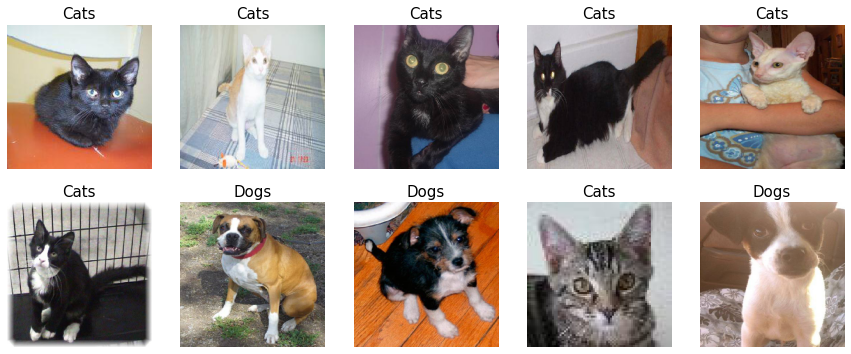

Augmentation 적용한 사진 파일
(64, 227, 227, 3) (64, 2)
[0. 1.]


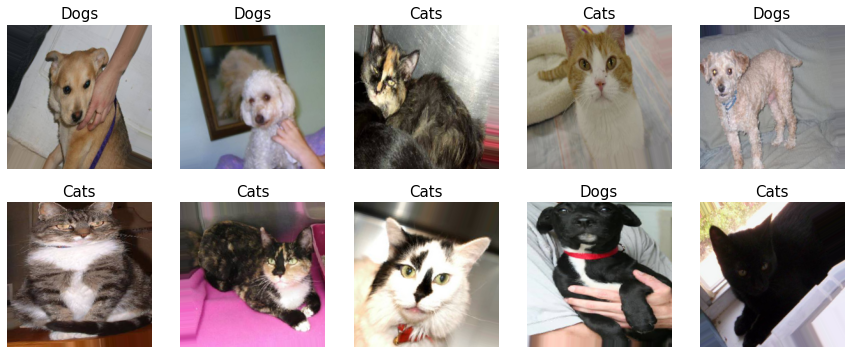

In [66]:
print('오리지널 사진 파일')

for x, y in original_generator:
    print(x.shape, y.shape)
    print(y[0])
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')
    plt.show()
    break
    
print('Augmentation 적용한 사진 파일')
    
for x, y in training_generator:
    print(x.shape, y.shape)
    print(y[0])
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')
    
    plt.show()
    break

## Model

In [33]:
Image(url='https://storage.ning.com/topology/rest/1.0/file/get/2808365162?profile=original', width=650)

In [57]:
NUM_CLASSES = 2

In [58]:
model = tf.keras.models.Sequential([
    # 코드입력
    # 1st conv
    tf.keras.layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),
    # 2nd conv
    tf.keras.layers.Conv2D(256, (5, 5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),
     # 3rd conv
    tf.keras.layers.Conv2D(384, (3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    # 4th conv
    tf.keras.layers.Conv2D(384, (3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    # 5th Conv
    tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),
    # Flatten layer
    tf.keras.layers.Flatten(),
    # To FC layer 1
    tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dropout(0.5), 
    #To FC layer 2
    tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [59]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_20 (Batc (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_21 (Batc (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 13, 13, 384)      

In [68]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

## fit()

In [69]:
EPOCHS = 10

In [70]:
history = model.fit(training_generator, 
                    validation_data=(validation_generator), 
                    epochs=EPOCHS
                   )

Epoch 1/10
32/32 [==============================] - 19s 582ms/step - loss: 0.7024 - acc: 0.5983 - val_loss: 0.7922 - val_acc: 0.5010
Epoch 2/10
32/32 [==============================] - 18s 572ms/step - loss: 0.6841 - acc: 0.5778 - val_loss: 0.8277 - val_acc: 0.4880
Epoch 3/10
32/32 [==============================] - 18s 574ms/step - loss: 0.6581 - acc: 0.6198 - val_loss: 0.7280 - val_acc: 0.5910
Epoch 4/10
32/32 [==============================] - 18s 572ms/step - loss: 0.6367 - acc: 0.6488 - val_loss: 1.9658 - val_acc: 0.5060
Epoch 5/10
32/32 [==============================] - 18s 569ms/step - loss: 0.6405 - acc: 0.6336 - val_loss: 1.0551 - val_acc: 0.5040
Epoch 6/10
32/32 [==============================] - 18s 578ms/step - loss: 0.6166 - acc: 0.6711 - val_loss: 1.1832 - val_acc: 0.5070
Epoch 7/10
32/32 [==============================] - 18s 572ms/step - loss: 0.6149 - acc: 0.6713 - val_loss: 0.7361 - val_acc: 0.6370
Epoch 8/10
32/32 [==============================] - 18s 567ms/step - 

## 시각화

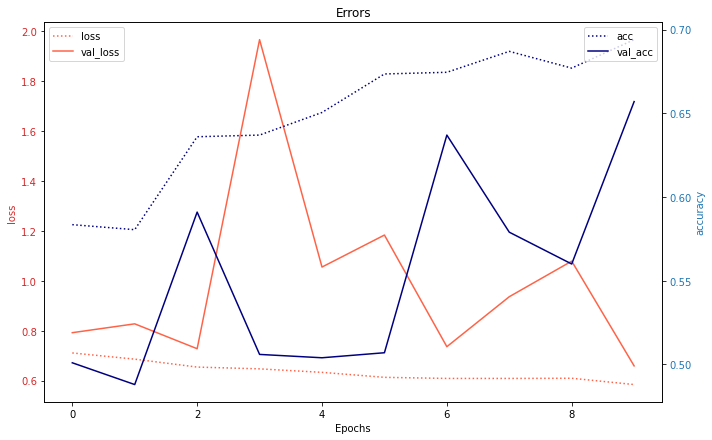

In [71]:
fig, ax1 = plt.subplots()
fig.set_size_inches((10, 6))

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss', color=color)
ax1.plot(range(EPOCHS), history.history['loss'], label='loss', linestyle=':', color='tomato')
ax1.plot(range(EPOCHS), history.history['val_loss'], label='val_loss', color='tomato')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(range(EPOCHS), history.history['acc'], label='acc', linestyle=':', color='navy')
ax2.plot(range(EPOCHS), history.history['val_acc'], label='val_acc', color='navy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.title('Errors')
plt.show()